# Problem #0 Salary

In [3]:
warnings.filterwarnings("ignore")

In [18]:
import warnings
from colorama import Fore, Back, Style 
import pandas as pd
import os
import numpy as np
import scattertext as st
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#import sys                                                    #Causes problems with regression in skikitlearn 
#reload(sys)                                                   #later on. Find different way to make Count Vectorizer
#sys.setdefaultencoding('utf8')                                #work. In future be carefull making global changes
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import ARDRegression
from sklearn.ensemble import BaggingRegressor
from scipy.cluster.hierarchy import dendrogram, linkage
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
os.chdir(r'C:\Users\gwhit\Downloads\Stat517-master\Data')
salaryfn = 'salary_uk.csv'
salary_uk = pd.read_csv(salaryfn)

# Word Cloud Visualization

In [13]:
text = salary_uk['FullDescription'].str.cat(sep=' ')

(-0.5, 399.5, 199.5, -0.5)

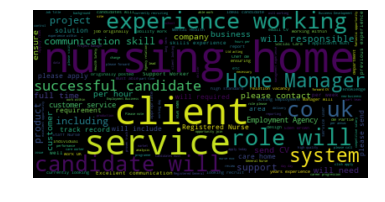

In [14]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [15]:
text = salary_uk['Title'].str.cat(sep=' ')

(-0.5, 399.5, 199.5, -0.5)

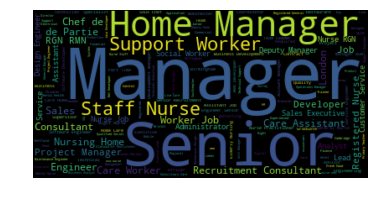

In [16]:
# Generate a word cloud image
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

Lots of Managers :)

# Other Visualizaion

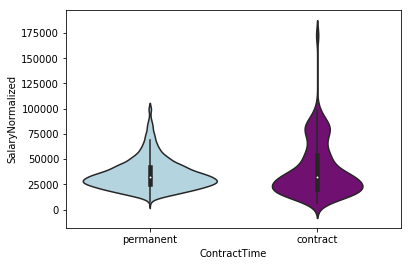

In [25]:
sns.violinplot("ContractTime", "SalaryNormalized", data=salary_uk,
               palette=["lightblue", "purple"]);

Here we can see that the majority of both the permanent and contract jobs are around 25k a year with the contract work having the bulk of its work at a slightly lower rate. Interestingly though it appears that there is some very high paying contract work that simply doesn't exist for permanent positions.

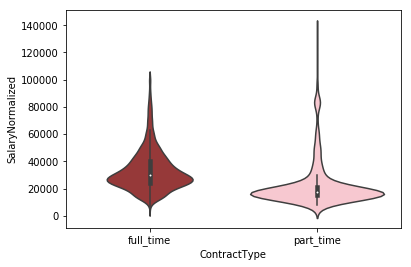

In [27]:
sns.violinplot("ContractType", "SalaryNormalized", data=salary_uk,
               palette=["brown", "pink"]);

Within the Contract work it appears that for the most part the full time contracts have higher salaries tha the part time contracts. Although as with the other violin plot comparing contract to non contract work it looks as if part time contracts have the potential to have a very high salary.

# Preprocessing

In [5]:
#drop redundant raw location and raw salary features
salary_uk = salary_uk.drop([u'LocationRaw', u'SalaryRaw', u'SourceName'],axis =1)

In [6]:
salary_uk.head()

,Id,Title,FullDescription,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryNormalized
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,25000
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,30000
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,30000
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,27500
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000


In [7]:
salary_uk.columns

Index(['Id', 'Title', 'FullDescription', 'LocationNormalized', 'ContractType',
       'ContractTime', 'Company', 'Category', 'SalaryNormalized'],
      dtype='object')

In [8]:
#Uses CountVectorizer, I use TfidVectorizer which is superior to CountVectorizer because it 
#uses term frequency-inverse document frequency (TF–IDF) which weights the word counts by a measure 
#of how often they appear in the documents rather than just a simple count of how often each term appears.

#vec = CountVectorizer()
#X = vec.fit_transform(salary_uk['Title'].values.astype('string'))
#Title = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [9]:
#Vectorizes Title feature using term frequency-inverse document frequency 
vec = TfidfVectorizer()
X = vec.fit_transform(salary_uk['Title'].values.astype('str'))
Title = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [10]:
#Vectorizes FullDescription feature using term frequency-inverse document frequency 
vec = TfidfVectorizer()
X = vec.fit_transform(salary_uk['FullDescription'].values.astype('str'))
FullDescription = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [11]:
salary_uk = pd.merge(salary_uk, Title, left_index=True, right_index=True)

In [12]:
#This adds the FullDescription vector. It also makes the dataframe a little bit too big to run on my laptop so for now its
#commented out. Without this the datframe will have 3902 columns instead of 31087. The dataframe with 31087 columns causes
#memory error.

salary_uk =pd.merge(salary_uk, FullDescription, left_index=True, right_index=True)

In [13]:
salary_uk = salary_uk.drop(['Title','FullDescription'], axis = 1) #drops the now redundant columns

In [14]:
salary_uk = pd.get_dummies(salary_uk, columns =[u'LocationNormalized',
       u'ContractType', u'ContractTime', u'Company', u'Category'])

In [15]:
salary_uk.head()

,Id,SalaryNormalized,10_x,100_x,1000_x,11_x,11501250,12_x,140_x,15_x,...,Category_Other/General Jobs,"Category_PR, Advertising & Marketing Jobs",Category_Property Jobs,Category_Retail Jobs,Category_Sales Jobs,Category_Scientific & QA Jobs,Category_Social work Jobs,Category_Teaching Jobs,Category_Trade & Construction Jobs,Category_Travel Jobs
0,12612628,25000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,12612830,30000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,12612844,30000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,12613049,27500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,12613647,25000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# PCA

Although this problem doesn't explicitly call for a PCA I'm doing one because the analysis is prohibitively slow without it. 

In [16]:
Y_salary_uk = salary_uk['SalaryNormalized']
X_salary_uk = salary_uk.drop('SalaryNormalized', axis=1)

In [17]:
#Uses the first 1000 principle components for analysis
pca = PCA(n_components=1000)
pca.fit(X_salary_uk)
X_salary_uk = pca.transform(X_salary_uk)


Now we have our dataset ready for analysis.

# Partitioning the Data Set

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_salary_uk, Y_salary_uk,
                                                random_state=9)
Xcolnames = list(X_salary_uk)

In [19]:
Y_salary_uk.shape

(10000,)

In [20]:
X_salary_uk.shape

(10000, 1000)

# Analysis

# Linear Regression

In [21]:
lr = LinearRegression().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(lr.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(lr.score(Xtest, ytest)))

Training set score: 0.69
Test set score: 0.63


In [22]:
scores = cross_val_score(lr, X_salary_uk, Y_salary_uk, cv=5)
print(Fore.BLUE + "Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.28


# Ridge Regression

In [23]:
ridge = Ridge().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(ridge.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(ridge.score(Xtest, ytest)))

Training set score: 0.69
Test set score: 0.64


In [24]:
scores = cross_val_score(ridge, X_salary_uk, Y_salary_uk, cv=5)
print(Fore.BLUE +"Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.51


In [25]:
ridge10 = Ridge(alpha=10).fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(ridge10.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(ridge10.score(Xtest, ytest)))

Training set score: 0.63
Test set score: 0.61


In [26]:
scores = cross_val_score(ridge10, X_salary_uk, Y_salary_uk, cv=5)
print(Fore.BLUE +"Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.53


# K Nearest Neighbors Regressor

In [27]:
# instantiate the model and set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets:
reg.fit(Xtrain, ytrain)
print("Test set R^2: {:.2f}".format(reg.score(Xtest, ytest)))

Test set R^2: 0.09


In [28]:
scores = cross_val_score(reg, X_salary_uk, Y_salary_uk, cv=5)
print(Fore.BLUE +"Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: -0.12


In [29]:
# instantiate the model and set the number of neighbors to consider to 50:
reg = KNeighborsRegressor(n_neighbors=50)
# fit the model using the training data and training targets:
reg.fit(Xtrain, ytrain)
print("Test set R^2: {:.2f}".format(reg.score(Xtest, ytest)))

Test set R^2: 0.13


In [32]:
scores = cross_val_score(reg, X_salary_uk, Y_salary_uk, cv=5)
print(Fore.BLUE +"Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: -0.04


In [33]:
# instantiate the model and set the number of neighbors to consider to 150:
reg = KNeighborsRegressor(n_neighbors=150)
# fit the model using the training data and training targets:
reg.fit(Xtrain, ytrain)
print("Test set R^2: {:.2f}".format(reg.score(Xtest, ytest)))

Test set R^2: 0.08


In [34]:
scores = cross_val_score(reg, X_salary_uk, Y_salary_uk, cv=5)
print(Fore.BLUE +"Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: -0.09


# Lasso

In [35]:
lasso = Lasso().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(lasso.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(lasso.score(Xtest, ytest)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.68
Test set score: 0.64
Number of features used: 919


In [36]:
scores = cross_val_score(lasso, X_salary_uk, Y_salary_uk, cv=5)
print(Fore.BLUE +"Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.51


In [37]:
lasso001 = Lasso(alpha=0.9, max_iter=1000).fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(lasso001.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(lasso001.score(Xtest, ytest)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.69
Test set score: 0.64
Number of features used: 928


In [38]:
scores = cross_val_score(lasso001, X_salary_uk, Y_salary_uk, cv=5)
print(Fore.BLUE +"Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.50


In [39]:
lasso01 = Lasso(alpha=0.1, max_iter=1000).fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(lasso001.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(lasso001.score(Xtest, ytest)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.69
Test set score: 0.64
Number of features used: 928


In [40]:
scores = cross_val_score(lasso01, X_salary_uk, Y_salary_uk, cv=5)
print(Fore.BLUE +"Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.38


In [41]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=1000).fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(lasso001.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(lasso001.score(Xtest, ytest)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.69
Test set score: 0.63
Number of features used: 1000


In [42]:
scores = cross_val_score(lasso001, X_salary_uk, Y_salary_uk, cv=5)
print(Fore.BLUE +"Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.30


In [43]:
lasso00001 = Lasso(alpha=0.0001, max_iter=1000).fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(lasso00001.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(lasso00001.score(Xtest, ytest)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.69
Test set score: 0.63
Number of features used: 1000


In [44]:
scores = cross_val_score(lasso00001, X_salary_uk, Y_salary_uk, cv=5)
print(Fore.BLUE +"Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.28


# Decision Tree Regressor

In [45]:
tree = DecisionTreeRegressor().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(tree.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(tree.score(Xtest, ytest)))

Training set score: 1.00
Test set score: 0.05


In [46]:
scores = cross_val_score(tree, X_salary_uk, Y_salary_uk, cv=5)
print(Fore.BLUE +"Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: -0.45


# Gradient Boosting Regressor

In [47]:
gbtr = GradientBoostingRegressor().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(gbtr.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(gbtr.score(Xtest, ytest)))

Training set score: 0.63
Test set score: 0.50


In [48]:
scores = cross_val_score(gbtr, X_salary_uk, Y_salary_uk, cv=5)
print(Fore.BLUE +"Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.36


# Ada Boost Regressor

In [49]:
#not worth running. Bad Test accuracy and expensive computationally.

#abtr = AdaBoostRegressor().fit(Xtrain, ytrain)
#print("Training set score: {:.2f}".format(abtr.score(Xtrain, ytrain)))
#print("Test set score: {:.2f}".format(abtr.score(Xtest, ytest)))

# Extra Trees Regressor

In [50]:
etr = ExtraTreesRegressor().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(etr.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(etr.score(Xtest, ytest)))

Training set score: 1.00
Test set score: 0.52


In [51]:
scores = cross_val_score(etr, X_salary_uk, Y_salary_uk, cv=5)
print(Fore.BLUE +"Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.33


# Random Forest Regressor

In [52]:
rfr = RandomForestRegressor().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(rfr.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(rfr.score(Xtest, ytest)))

Training set score: 0.90
Test set score: 0.44


In [53]:
scores = cross_val_score(rfr, X_salary_uk, Y_salary_uk, cv=5)
print(Fore.BLUE +"Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.28


# Gaussian Process Regressor

In [54]:
#Not worth running. Bad test accuracy and expensive computationaly 

#gpr = GaussianProcessRegressor().fit(Xtrain, ytrain)
#print("Training set score: {:.2f}".format(gpr.score(Xtrain, ytrain)))
#print("Test set score: {:.2f}".format(gpr.score(Xtest, ytest)))

# ARD Regression

In [55]:
#not worth running. Bad test accuracy and expensive computationaly

#ardr = ARDRegression().fit(Xtrain, ytrain)
#print("Training set score: {:.2f}".format(ardr.score(Xtrain, ytrain)))
#print("Test set score: {:.2f}".format(ardr.score(Xtest, ytest)))

# Bagging Regressor

In [56]:
bingr = BaggingRegressor().fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(bingr.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(bingr.score(Xtest, ytest)))

Training set score: 0.90
Test set score: 0.49


In [57]:
scores = cross_val_score(bingr, X_salary_uk, Y_salary_uk, cv=5)
print(Fore.BLUE +"Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.25


In [58]:
bingr = BaggingRegressor(n_estimators = 5).fit(Xtrain, ytrain)
print("Training set score: {:.2f}".format(bingr.score(Xtrain, ytrain)))
print("Test set score: {:.2f}".format(bingr.score(Xtest, ytest)))

Training set score: 0.87
Test set score: 0.39


In [59]:
scores = cross_val_score(bingr, X_salary_uk, Y_salary_uk, cv=5)
print(Fore.BLUE +"Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.18


# Conclusion

Ridge regression with an alpha of 10 seemed to perform the best. Ridge regression with the standard hyperparameters also performed similarly. It also seemed strange to me that after doing a PCA linear regression performed much better than without a PCA. I suspect that this has something to do with how PCA works but I'm not exactly sure. 

The Ridge regression model as performed much faster than the majority of the other models as well so it looks like its an all around winner. I thought that the Bagging Regressor, Random Forest Regressor and Gradient Boosting Regressor as well as a few of the more computationally expensive algorithms would perform better but this was not the case. I suppose it is a good lesson to learn. More complex and expensive doesn't necessarily mean that it is better. 

In The future if this was a really important question to answer our results could probably be marginally improved by using the entire dataset instead of just using the first thousand principle components